<a href="https://colab.research.google.com/github/Chaitanya9279/cardekho-/blob/main/cardekho_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)From which manufacturing year to which manufacturing year vehicles are present in this data ?
2)What is the lowest price to which a vehicle is sold ?
3)What is the highest price to which a vehicle is sold ?
4)How many records are there in this data ?
5)Are there any missing records in this data ?
6)How many different vehicles are present in this data ?
7)Which is the most sold vehicle in this data ?
8)Does the database include any CNG vehicle ? If yes how many of them are there ?
9)How many vehicles here are for sell from Individuals directly ?
10)Does this database contain auto transmission vehicles ? If yes how many of them are there ?
11)How many single person owned vehicles are there in this database ?
12)Which is the most and least cost depreciated vehicle in data ?
13)Which brands of vehicles are less affected by cost depreciation ?
14)Are there any factors which you feel affect the cost depreciation ?
15)In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
16)Can we get idea about newest vehicles i.e. after 2014 manufactured ?
17)Can we find out data of only two wheelers from this data ?
Which is the oldest bike sold here?
18)Which is the newest bike sold here?
19)Which is the most sold bike here?
20)Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
21)Can we find out data of only cars from this data ?
22)Which is the oldest car sold here?
23)Which is the newest car sold here?
24)Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?

In [ ]:
import pandas as pd
df=pd.read_csv("/content/car_Dekho_DA.csv")

In [ ]:
#From which manufacturing year to which manufacturing year vehicles are present in this data ?
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


From the Year 2003 to Year 2018 vehicles are present in the data

In [ ]:
#What is the lowest price to which a vehicle is sold ?
lowest_price_vehicle_sold = df["Selling_Price"].min()
print(f"The lowest price a vehicle sold is {lowest_price_vehicle_sold} lakhs")

The lowest price a vehicle sold is 0.1 lakhs


In [ ]:
#What is the highest price to which a vehicle is sold ?
highest_price_vehicle_sold = df["Selling_Price"].max()
print(f"The highest price a vehicle sold is {highest_price_vehicle_sold} lakhs")

The highest price a vehicle sold is 35.0 lakhs


In [ ]:
#How many records are there in this data ?
df.tail()
no_of_records = df.shape[0]
print(f"Total number of records int the dataframe are {no_of_records}")
#df.tail() shows the last few rows of the DataFrame, which is useful for inspecting recent data.
#df.shape[0] gets the total number of records (rows) in the DataFrame.



Total number of records int the dataframe are 301


In [ ]:
#Are there any missing records in this data ?
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing records in this data

In [ ]:
#How many different vehicles are present in this data ?
different_vehicles = df["Car_Name"].nunique()
print(f"The number of different vehicles are {different_vehicles}")

The number of different vehicles are 98


In [ ]:
#Which is the most sold vehicle in this data ?
most_sold_car = df["Car_Name"].mode()
print(f"the most sold car is {most_sold_car}")

the most sold car is 0    city
Name: Car_Name, dtype: object


In [ ]:
#Does the database include any CNG vehicle ?
no_of_cng = (df["Fuel_Type"] == "CNG").sum()
print(f"Number of cng vehicles are {no_of_cng}")

Number of cng vehicles are 2


In [ ]:
#How many vehicles here are for sell from Individuals directly ?
m= df["Seller_Type"].value_counts()

indi_count = m["Individual"]
print(f"the individual sellers are {indi_count}")

the individual sellers are 106


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


<Axes: xlabel='Transmission'>

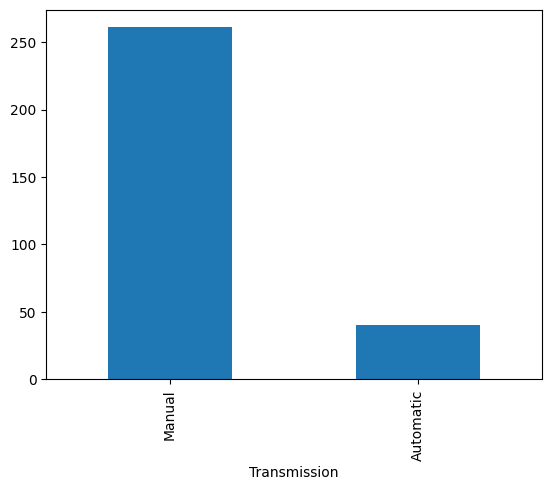

In [ ]:
#Does this database contain auto transmission vehicles ? If yes how many of them are there ?
print(df.Transmission.value_counts())
df.Transmission.value_counts().plot.bar()

In [ ]:
#How many single person owned vehicles are there in this database ?
df.Owner.value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

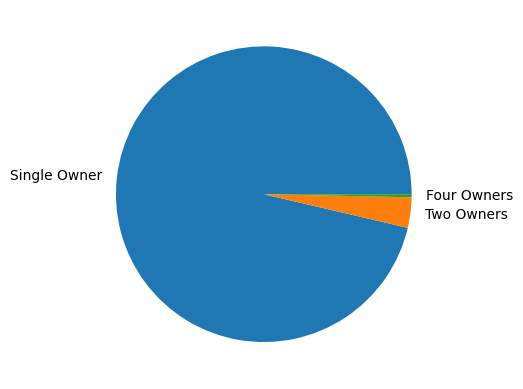

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df.Owner.value_counts(),labels=["Single Owner","Two Owners","Four Owners"])
plt.show()

In [ ]:
#Which is the most and least cost depreciated vehicle in data ?
#Highest depriciation observed from the vehicles in data
df['depriciation'] = df['Present_Price'] - df['Selling_Price']
df.loc[df.depriciation == df.depriciation.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0,57.6


In [ ]:
#Which is the most and least cost depreciated vehicle in data ?
df['depriciation'] = df['Present_Price'] - df['Selling_Price']

#Lowest depriciation observed from the vehicles in data
df.loc[df.depriciation == df.depriciation.min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
155,Honda Activa 4G,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0,0.03


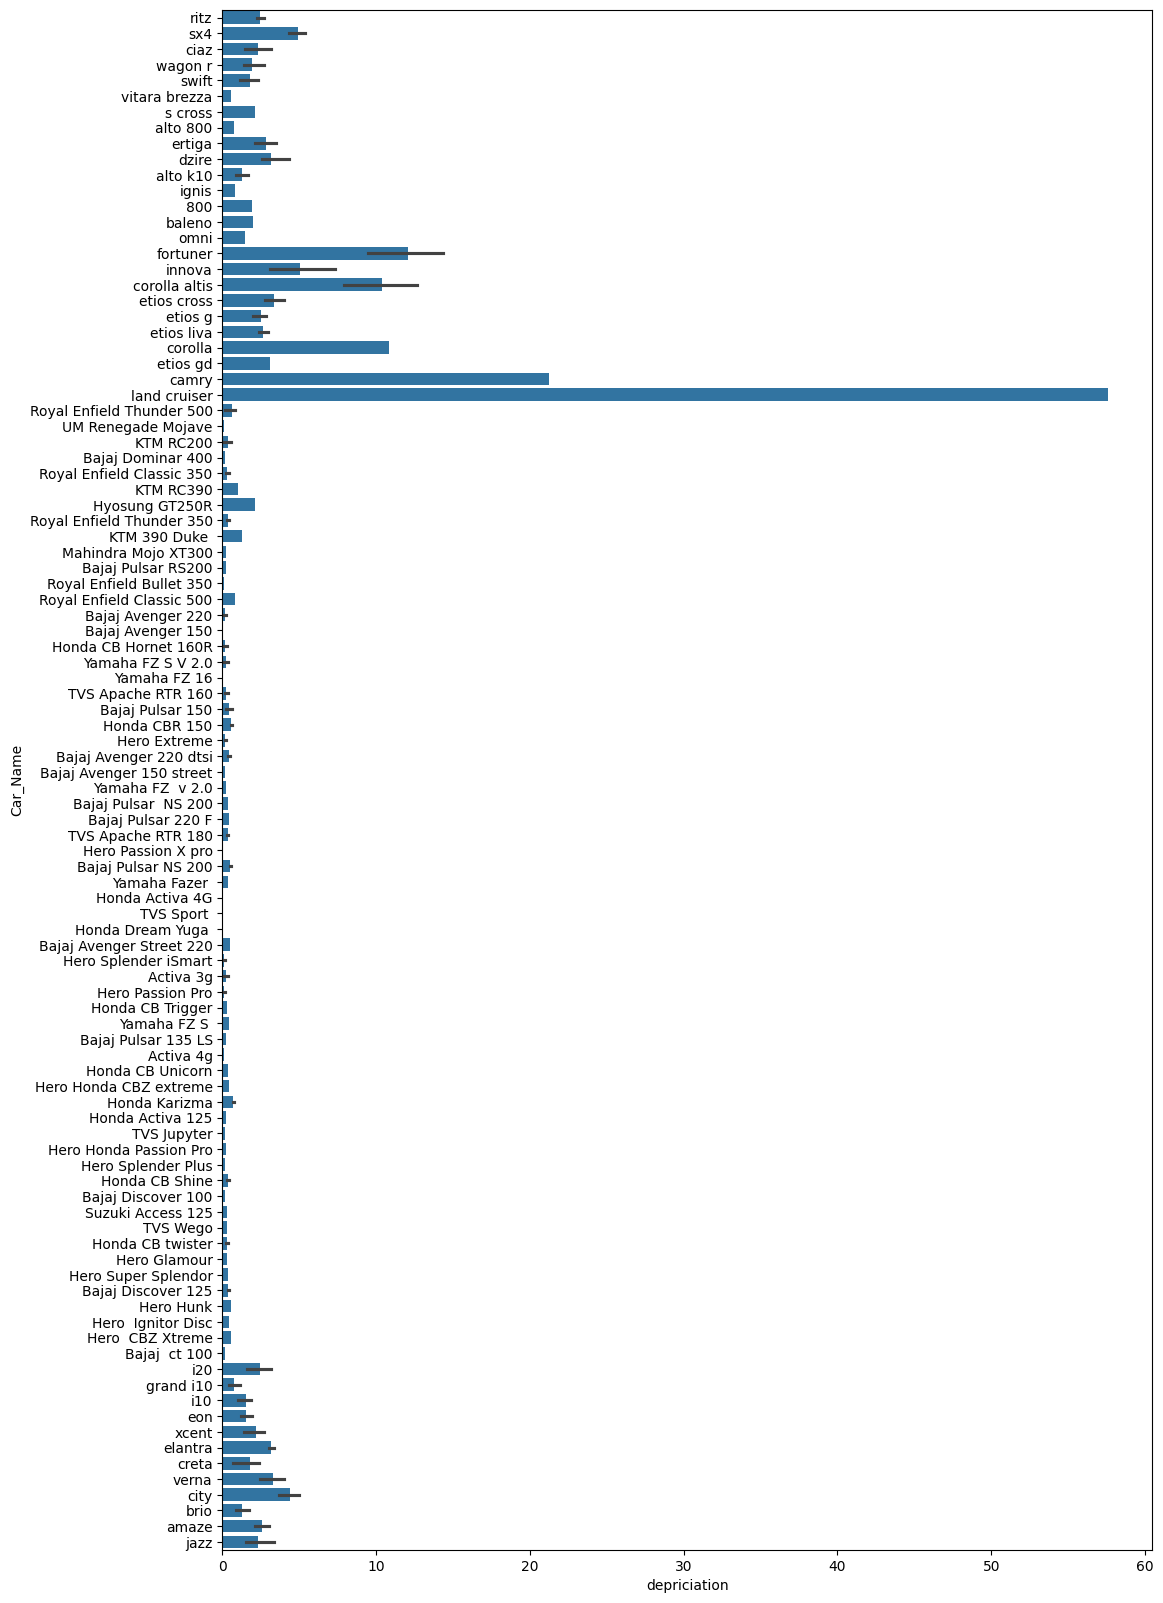

In [ ]:
#Which brands of vehicles are less affected by cost depreciation ?
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the depreciation if you haven't already
df['depriciation'] = df['Present_Price'] - df['Selling_Price']

fig_dims = (12,20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = df.depriciation,y = df.Car_Name,ax = ax,data=df)
plt.show()

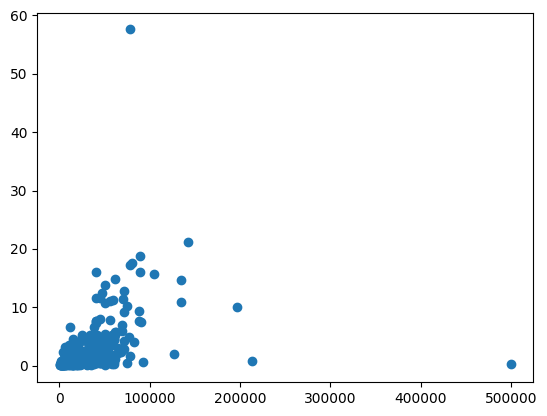

In [ ]:
#Are there any factors which you feel affect the cost depreciation ?
plt.scatter(df.Kms_Driven,df.depriciation)
plt.xlabel = "Kilometers Driven"
plt.ylabel = "Cost depriciation in Lakhs"
plt.title = "Cost depriciation vs Kilometers Driven"
plt.show()

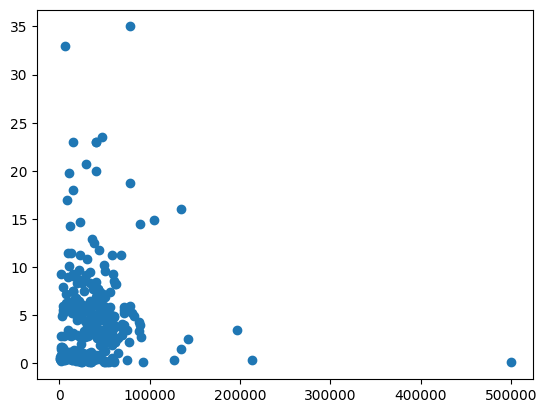

In [ ]:
#In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?
plt.scatter(df.Kms_Driven,df.Selling_Price)
plt.xlabel = "Kilometers Driven"
plt.ylabel = "Selling Price  in Lakhs"
plt.title = "Selling price vs Kilometers Driven"
plt.show()


In [ ]:
#Can we get idea about newest vehicles i.e. after 2014 manufactured ?
new_vehicles = df[df['Year'] >= 2015]
new_vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,1.37
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,2.11
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,0.14


In [ ]:
#Can we find out data of only two wheelers from this data ?
two_wheelers = df[df["Present_Price"]<3.5]
print(two_wheelers.head())


                      Car_Name  Year  Selling_Price  Present_Price  \
23                    alto k10  2014           2.50           3.46   
37                         800  2003           0.35           2.28   
44                        omni  2012           1.25           2.69   
100  Royal Enfield Thunder 500  2016           1.75           1.90   
101         UM Renegade Mojave  2017           1.70           1.82   

     Kms_Driven Fuel_Type Seller_Type Transmission  Owner  depriciation  
23        45280    Petrol      Dealer       Manual      0          0.96  
37       127000    Petrol  Individual       Manual      0          1.93  
44        50000    Petrol      Dealer       Manual      0          1.44  
100        3000    Petrol  Individual       Manual      0          0.15  
101        1400    Petrol  Individual       Manual      0          0.12  


In [ ]:
two_wheelers.reset_index(drop=True,inplace=True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
0,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0,0.96
1,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,1.93
2,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,1.44
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12


In [ ]:
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12


In [ ]:
two_wheelers.reset_index(drop=True,inplace=True)

In [ ]:
# Assuming 'df' is your DataFrame
two_wheelers = df[df["Present_Price"] < 3.5]  # Recreate the two_wheelers DataFrame
two_wheelers.reset_index(drop=True, inplace=True)

# Filter out specific car names if needed
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]

print(two_wheelers)
two_wheelers.head()

                      Car_Name  Year  Selling_Price  Present_Price  \
3    Royal Enfield Thunder 500  2016           1.75           1.90   
4           UM Renegade Mojave  2017           1.70           1.82   
5                    KTM RC200  2017           1.65           1.78   
6            Bajaj Dominar 400  2017           1.45           1.60   
7    Royal Enfield Classic 350  2017           1.35           1.47   
..                         ...   ...            ...            ...   
99                   Activa 3g  2008           0.17           0.52   
100           Honda CB twister  2010           0.16           0.51   
101         Bajaj Discover 125  2011           0.15           0.57   
102             Honda CB Shine  2007           0.12           0.58   
103           Bajaj Pulsar 150  2006           0.10           0.75   

     Kms_Driven Fuel_Type Seller_Type Transmission  Owner  depriciation  
3          3000    Petrol  Individual       Manual      0          0.15  
4          

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12


In [ ]:
#Which is the oldest bike sold here?
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
89,Hero Super Splendor,2005,0.2,0.57,55000,Petrol,Individual,Manual,0,0.37


In [ ]:
#Which is the newest bike sold here?
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0,0.15
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0,0.12
9,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0,0.27
26,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0,0.05
28,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0,0.07
29,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0,0.06
30,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0,0.12
32,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0,0.20


The most sold bike is: Royal Enfield Classic 350 with 7 sales.


<Axes: xlabel='count', ylabel='Car_Name'>

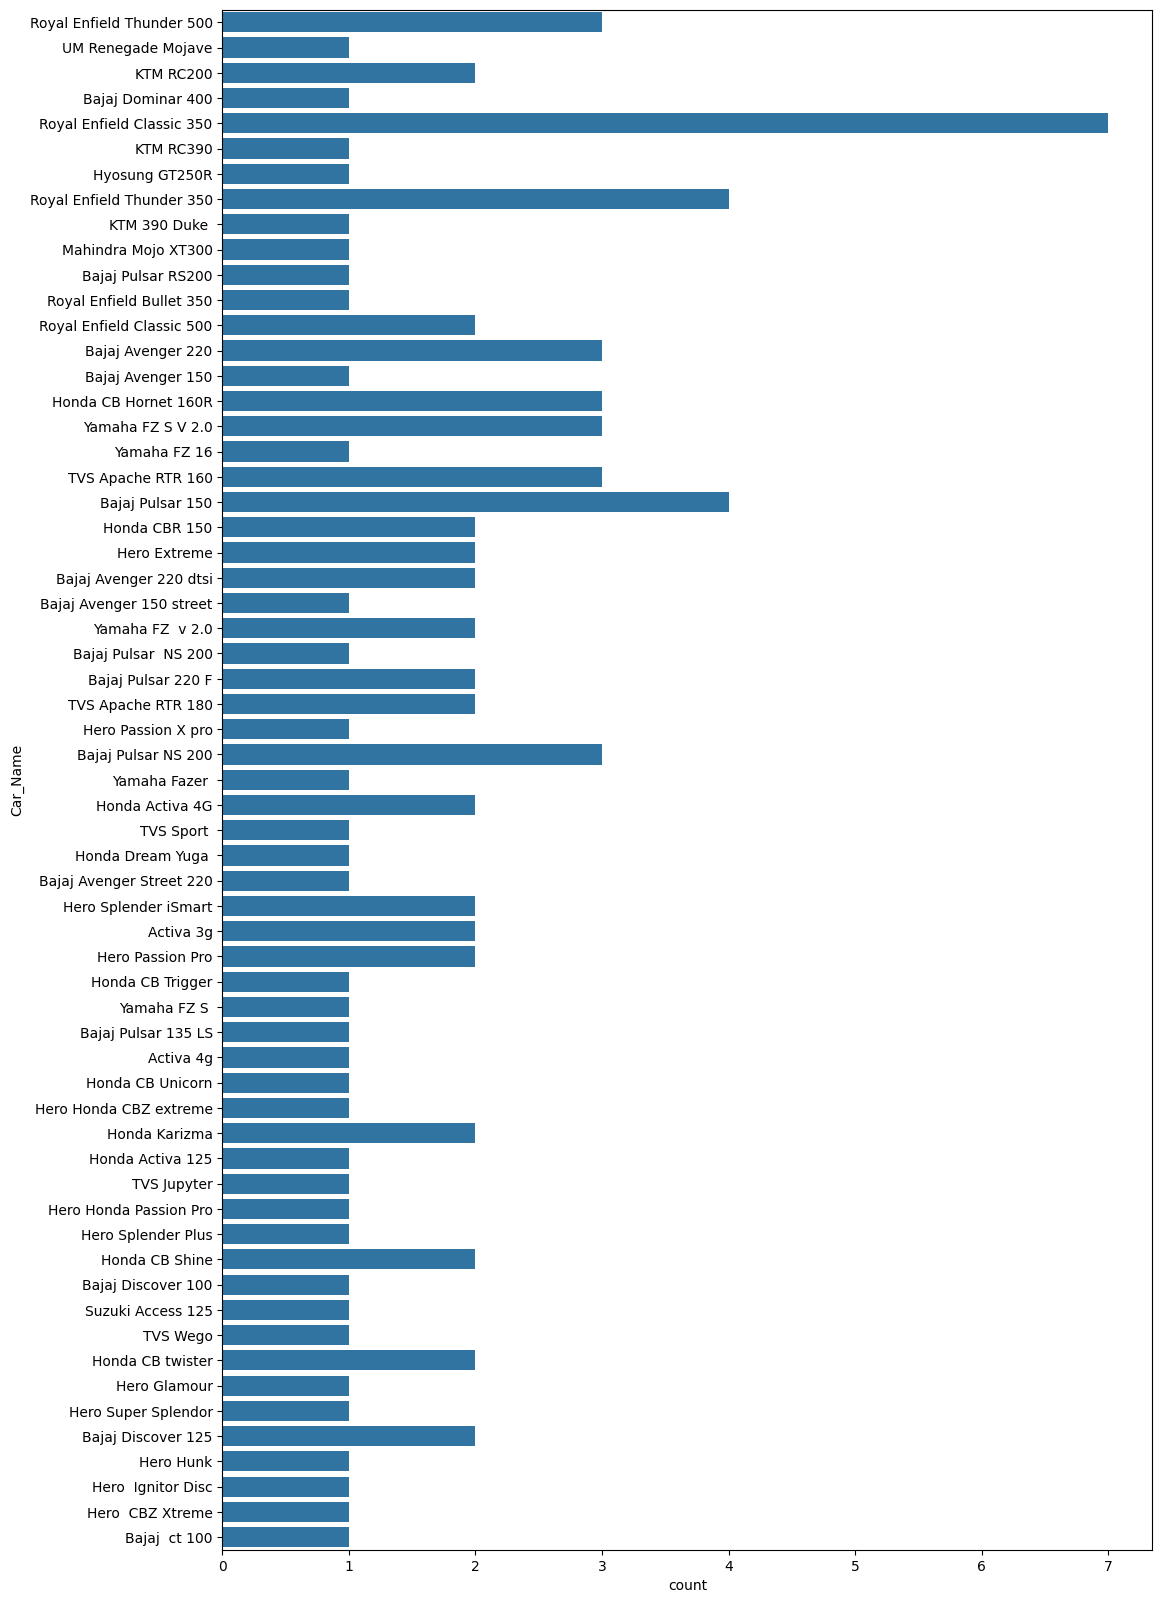

In [ ]:
#Which is the most sold bike here?
# Count the occurrences of each bike model in the Car_Name column
bike_counts = two_wheelers['Car_Name'].value_counts()

# Identify the bike model with the highest count
most_sold_bike = bike_counts.idxmax()
most_sold_count = bike_counts.max()

print(f"The most sold bike is: {most_sold_bike} with {most_sold_count} sales.")

import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (12,20)
fig ,ax = plt.subplots(figsize = fig_dims)
sns.countplot(y = two_wheelers.Car_Name,ax = ax ,data = two_wheelers)



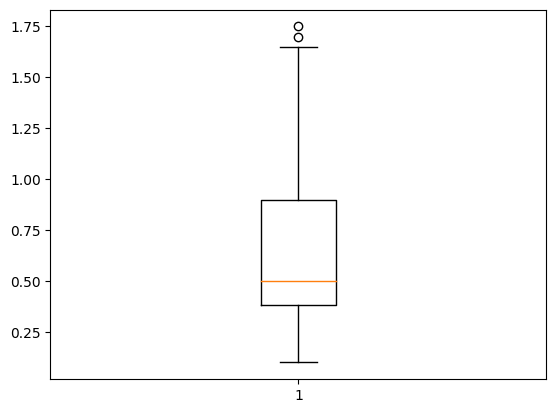

In [ ]:
#Do you find any deal in two wheelers which exceeded the general expectation ? Can you find reason for it ?
plt.boxplot(two_wheelers.Selling_Price)
plt.show()

In [ ]:
two_wheelers[two_wheelers.Selling_Price>1.6]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
0,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0,0.15
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0,0.12
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0,0.13


In [ ]:
#Can we find out data of only cars from this data ?
cars = df[df["Present_Price"]>2.0]
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [ ]:
cars.reset_index(drop = True, inplace = True)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27


In [ ]:
 #Which is the oldest car sold here?
four_wheelers = df[df["Selling_Price"] > 2.0] # Filter based on 'Selling_Price' assuming cars are more expensive
four_wheelers.loc[four_wheelers.Year == four_wheelers.Year.min()]


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0,5.73


In [ ]:
#Which is the newest car sold here?
four_wheelers.loc[four_wheelers.Year == four_wheelers.Year.max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,0.58


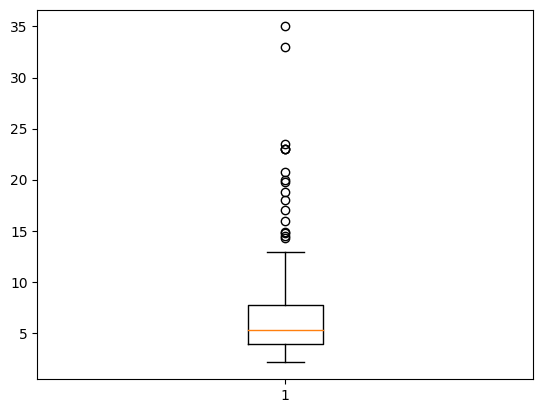

In [ ]:
#Do you find any deal in cars which exceeded the general expectation ? Can you find reason for it ?
plt.boxplot(four_wheelers.Selling_Price)
plt.show()

In [ ]:
four_wheelers[four_wheelers.Selling_Price>13]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depriciation
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0,15.71
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7.61
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0,1.77
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0,14.61
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0,15.97
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0,17.21
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0,12.46
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0,3.23
66,innova,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0,3.40
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,6.66
